![SVG from www](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Kühne_Logistics_University_logo_2019.svg/100px-Kühne_Logistics_University_logo_2019.svg.png)  
# Python Basics course September 2022  
### Kuehne Logistics University  

## Session 5: Data visualisation with the Seaborn library


In this session we will learn how to use the Seaborn library to make nice graphics using Python. Seaborn has more types of visualisation than we can possibly discuss in this course. An overview can be found on: https://seaborn.pydata.org/examples/index.html. 

As a basis, we will use the same datasets as we used in session 4. 

To start, we need to import the relevant libraries: `numpy` and `pandas` as usual and now, of course, `seaborn`. Note how we also need to import `matplotlib.pyplot`, on which much of the functionality depends. 

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## Figure frames: matplotlib subplots

Matplotlib's subplots package provide the frame for the figure for [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

We usually start with defining a figure and axis with the `plt.subplots()` method. 

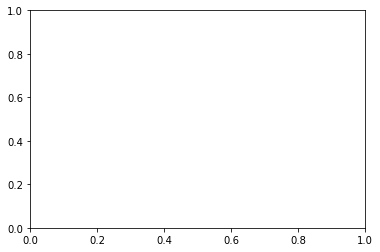

In [3]:
fig, ax = plt.subplots(1,1)

Using our `fig` variable we access things that are related to the whole figure, whereas `ax` allows us to access the plot (axis, labels, etc). The three main functions you will use are the __label, limits and ticks__. 

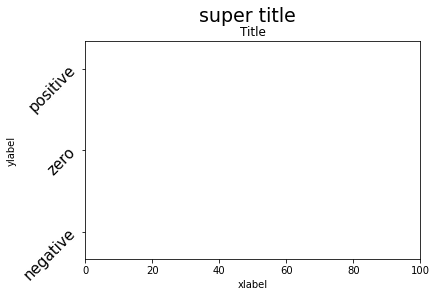

In [21]:
ax.set_title("Title")
ax.set_ylabel("ylabel")
ax.set_xlabel("xlabel")

ax.set_xlim([0,100])
ax.set_ylim([-1,1])

ax.set_yticks([-0.75,0,0.75])
ax.set_yticklabels(["negative","zero","positive"],rotation=45,fontsize=15)


fig.suptitle("super title",fontsize=19,y=1)

# showing our figure again
fig

`subplots` also allows us to make multiple figures, for example in a (2,2) matrix like this. Accordingly, we see that `ax` is a 2x2 array now as well. 

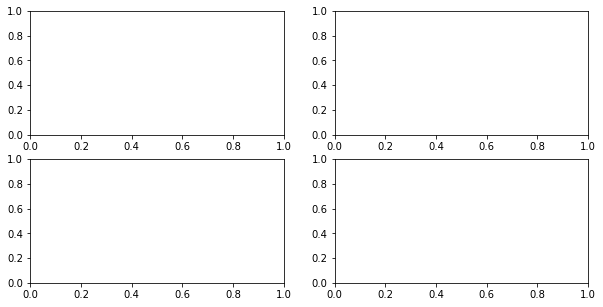

In [44]:
fig, ax = plt.subplots(2,2,figsize=(10,5))

In [45]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In order to modify titles now, we have to acces __one of the__ defined axis, using the usual brackets, as follows:

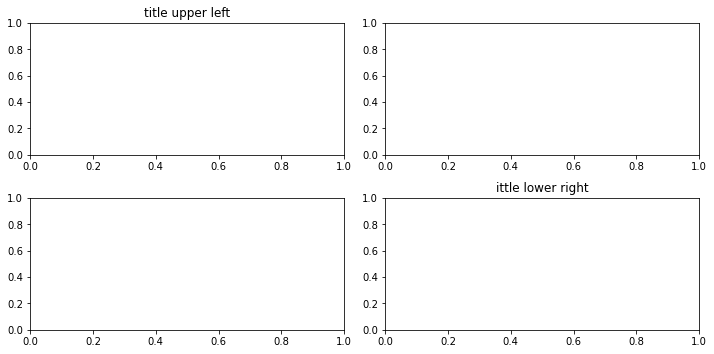

In [49]:
ax[0,0].set_title("title upper left")
ax[1,1].set_title("ittle lower right")

# Expanding the room between the different figures. 
fig.tight_layout(pad=1.0)

fig

## Getting to a visualisation

We will use the Pokemon dataset we used last week as well. Take a look at the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html) to see what the possibilities are to visualise your date. 

Every Seaborn visualisation type has its own fine characteristics, but the data interpretation is always the same. We always start to define the `ax`  __in which__ we want to make our graph. Then we enter the `DataFrame`, with the `data=` tool. We select the x and y position by feeding the column names to `x=` and `y=` respetively. All other arguments, regard the __visual__ properties of the graph. 


In [208]:
pwd = %pwd
poke_data = pd.read_csv(pwd+"/pokemon_data.csv")
poke_data

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,CatchDate
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,2021-09-16
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2021-02-13
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,2021-12-08
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,2021-04-20
4,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,2021-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,2021-03-14
796,796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,2021-05-10
797,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,2021-06-11
798,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,2021-08-02


Can you figure out what this barplot visualises, and what the error bar means? 

<AxesSubplot:xlabel='Generation', ylabel='HP'>

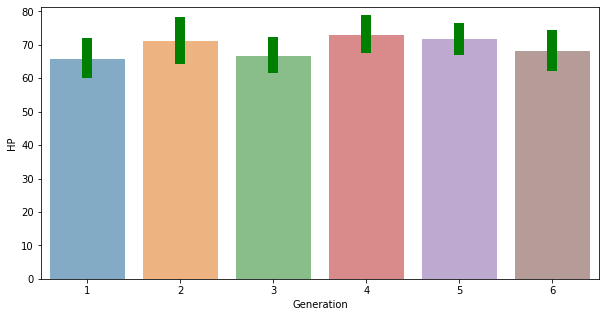

In [209]:
# Figure and ONE acis 
fig, ax = plt.subplots(1,1,figsize=(10,5))

# a barplot 
sns.barplot(ax=ax, 
            data=poke_data,
            x="Generation",
            y="HP",
            # Making it transparent
            alpha=0.6,
            # The color of the error bar
            errcolor="green",
            # the width of the error bar
            errwidth=10
           )

Let's say we're now interested in the HP per generation of pokemons. A boxplot is an insightful way to plot this

<AxesSubplot:xlabel='Generation', ylabel='HP'>

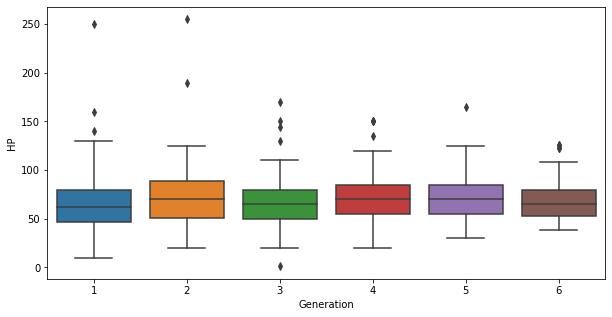

In [220]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            # linewidth=0.75,
           )

We also know that boxplots are criticized for hiding datapoints. So let's plot our datapoints per generation using `sns.stripplot`. 

<AxesSubplot:xlabel='Generation', ylabel='HP'>

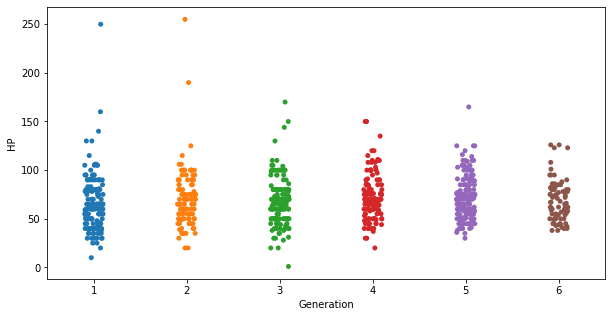

In [222]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.stripplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            # linewidth=0.75,
           )

<AxesSubplot:xlabel='Generation', ylabel='HP'>

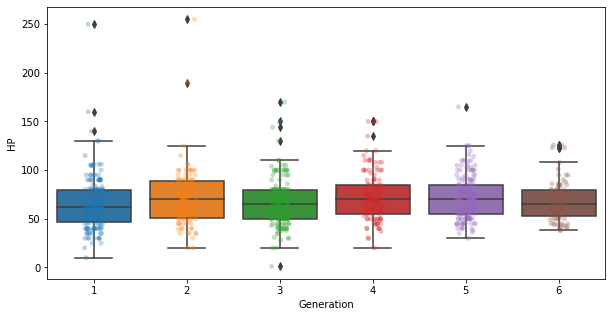

In [229]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.boxplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            # linewidth=0.75,
           )

sns.stripplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            alpha=0.3
            # linewidth=0.75,
           )

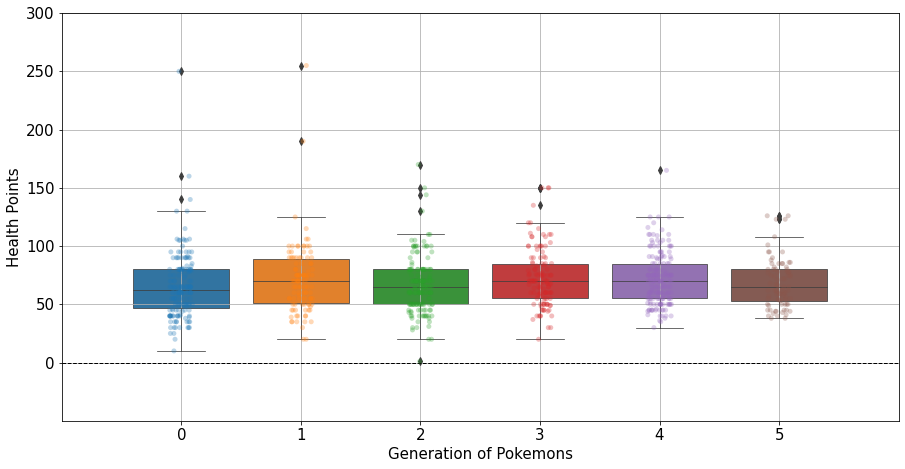

In [235]:
fig, ax = plt.subplots(1,1,figsize=(15,7.5))

sns.boxplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            linewidth=0.75, # Adjust the linewidth a little
           )

sns.stripplot(ax=ax, 
            data=poke_data,
            y="HP",
            x="Generation",
            alpha=0.3
            # linewidth=0.75,
           )

# Define an appropriate size for the axis titles and the tick labels
fontsize=15
ticksize = 15

# Make the x-axis nicer 
ax.set_xticklabels(ax.get_xticks(),fontsize=ticksize)
ax.set_xlim([-1,6])
ax.set_xlabel("Generation of Pokemons",fontsize=fontsize)

# Make the y-axis nicer
ax.set_ylabel("Health Points",fontsize=fontsize)
ax.set_ylim([-50,300])
ax.set_yticks([0,50,100,150,200,250,300])
ax.set_yticklabels(ax.get_yticks(),fontsize=ticksize)

# Highlight the nill line
sns.lineplot(ax=ax,y=[0,0],x=plt.xlim(),color="black",linestyle="--",lw=1)

# Difficult to read the values: add a grid

plt.grid()


## Pokemons over time 

Seaborn is able to make very nice graphs automatically, but sometimes odd things happen when feeding data. If we try to feed the caught pokemons' HP over time this happens: 


<AxesSubplot:xlabel='CatchDate', ylabel='HP'>

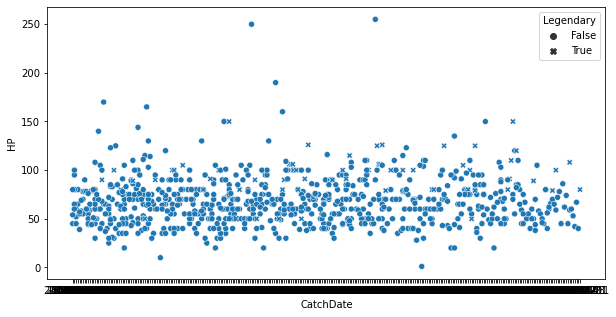

In [237]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(ax = ax, data=poke_data,x="CatchDate",y="HP",style="Legendary")

If we further investigate the datatype of the pokemon data we observe that those are Python Strings, whereas we have a TimeStamp class as well. 

In [238]:
type(poke_data["CatchDate"][0])

str

Using the `pd.to_datetime()` method we can automatically translate the Python strings to DateTimes. This allows Seaborn to automatically recognise the dates. The subsequent plot looks quite a lot cleaner all of the sudden. 

In [239]:
poke_data["CatchDate"] = pd.to_datetime(poke_data["CatchDate"])
type(poke_data["CatchDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='CatchDate', ylabel='HP'>

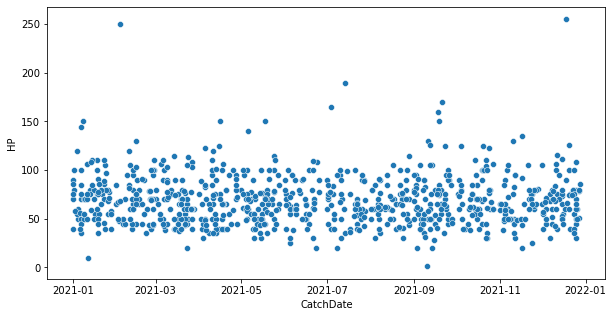

In [240]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(ax = ax, data=poke_data,x="CatchDate",y="HP")#,hue="Legendary",style="Legendary",alpha=0.75) #,legend=True,alpha=0.5)

Having this sorted out, we can take more information out of this graph by highlighting the legendary Pokemon that we caught:

<AxesSubplot:xlabel='CatchDate', ylabel='HP'>

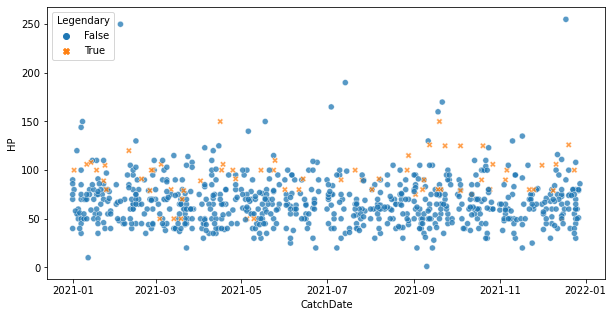

In [241]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(ax = ax, data=poke_data,x="CatchDate",y="HP",hue="Legendary",style="Legendary",alpha=0.75)

Another strategy to highlight certain data points is to do a so-called superposition of the plots. The orange markers are now plotted _on top of_ the blue ones. If we're happy with this setup we can finalise the graph like we did with the boxplots. 

C:\Users\DAAN~1.VAN\AppData\Local\Temp/ipykernel_23356/1094420163.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Jan 2021","Mar 2021","May 2021","Jul 2021","Sep 2021","Nov 2021","Jan 2022"],fontsize=ticksize)


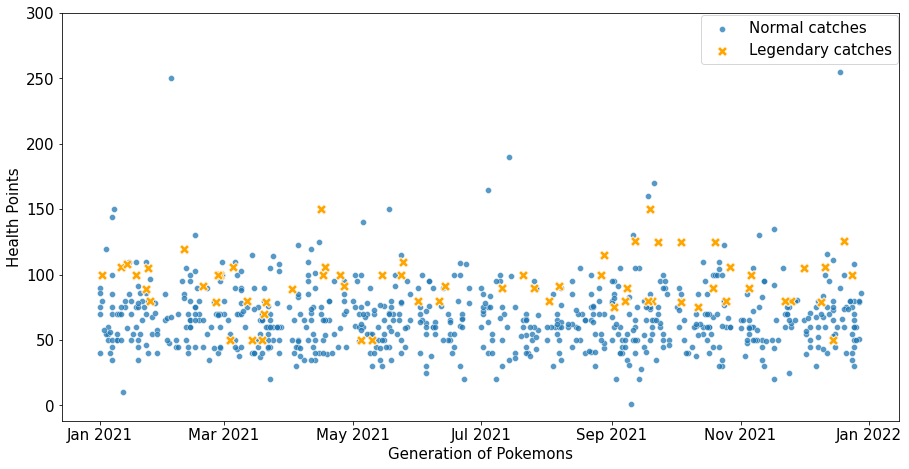

In [288]:
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
sns.scatterplot(ax = ax, data=poke_data,x="CatchDate",y="HP",alpha=0.75,label="Normal catches") #,legend=True,alpha=0.5)
sns.scatterplot(ax = ax, data=poke_data[poke_data["Legendary"]],x="CatchDate",y="HP",color="orange",marker='X',s=100,label="Legendary catches")


# Define an appropriate size for the axis titles and the tick labels
fontsize=15
ticksize = 15

# Make the x-axis nicer 
ax.set_xticklabels(["Jan 2021","Mar 2021","May 2021","Jul 2021","Sep 2021","Nov 2021","Jan 2022"],fontsize=ticksize)
ax.set_xlabel("Generation of Pokemons",fontsize=fontsize)

# Make the y-axis nicer
ax.set_ylabel("Health Points",fontsize=fontsize)
# ax.set_ylim([-50,300])
ax.set_yticks([0,50,100,150,200,250,300])
ax.set_yticklabels(ax.get_yticks(),fontsize=ticksize)

# Legend
ax.legend(fontsize=15,loc=(0.7640,0.875))


## Preparing data for useful visualisation
In order to see what we want to see we sometimes might have to add some information to our `DataFrame`. This can be quite nicely illustrated by trying to get an understanding of how many pokemons we caught during a certain time spanne. The seaborn `countplot` counts the number of rows that coincide with something; in this case: time. Let's make a countplot per day:

<AxesSubplot:xlabel='CatchDate', ylabel='count'>

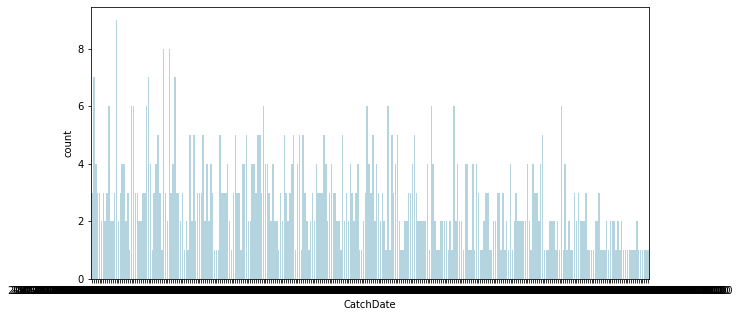

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(ax = ax , data=poke_data,x='CatchDate',color='lightblue',label="total")

Due to the number of days in the year it's not very insightful to plot this per day. However, we might want to have a look at how many Pokemon we caught per quarter. For that we can categorise the dataset into 4 parts by using the panda `.cut()` method as follows. This adds a column "Quarter" to our `DataFrame`. 

In [290]:
poke_data['Quarter'] = pd.cut(poke_data["CatchDate"], 
                               pd.to_datetime(["1/1/2021","1/3/2021","1/6/2021","1/9/2021","1/1/2022"],format='%d/%m/%Y'), 
                               labels=[0,1,2,3])
poke_data

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,CatchDate,Quarter
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,2021-09-16,3
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2021-02-13,0
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,2021-12-08,3
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,2021-04-20,1
4,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,2021-12-02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,2021-03-14,1
796,796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,2021-05-10,1
797,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,2021-06-11,2
798,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,2021-08-02,2


Now we can better use the `countplot` and we can make something up from our graph. 

<AxesSubplot:xlabel='Quarter', ylabel='count'>

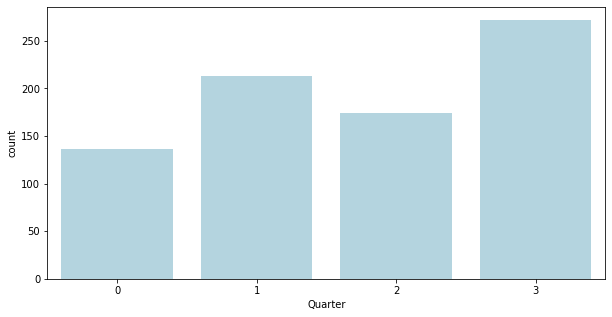

In [292]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(ax = ax , data=poke_data,x='Quarter',color='lightblue',label="total")

## Superpositioning plots
We might be interested in a part of the dataset that we would like to intuitively compare to the rest. We already did this briefly, but now more insightful. 

Let's say we're intersted in comparing the total versus the Grass type Pokemons that we caught. Firstly, we plot the number of Pokemons that we caught per quarter. On top of that we subselect the dataset for the grass pokemons, only to plot that __on top of__ the first plot. 

C:\Users\DAAN~1.VAN\AppData\Local\Temp/ipykernel_23356/1041059554.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,50,100,150,200,250,300],fontsize=ticksize)


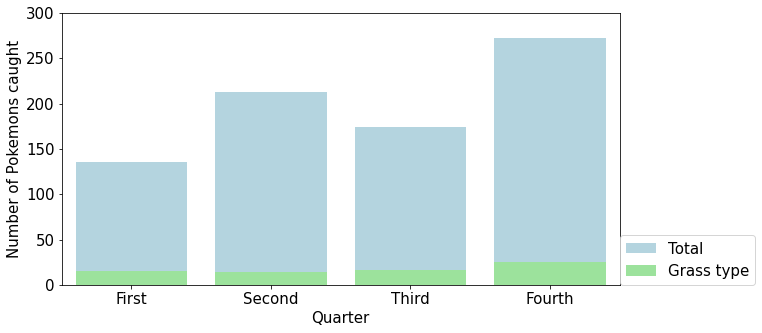

In [304]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

# First plot
sns.countplot(ax = ax , data=poke_data,x='Quarter',color='lightblue',label="Total")

# Grass pokemons
grass_subset = poke_data[poke_data["Type 1"]=="Grass"]
sns.countplot(ax = ax , data= grass_subset , x='Quarter',color='lightgreen',label="Grass type")

# Define an appropriate size for the axis titles and the tick labels
fontsize=15
ticksize = 15

# Make the x-axis nicer 
ax.set_xlabel("Quarter",fontsize=fontsize)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["First","Second","Third","Fourth"],fontsize=ticksize)

# Make the y-axis nicer
ax.set_ylabel("Number of Pokemons caught",fontsize=fontsize)
ax.set_ylim([0,300])

ax.set_yticklabels([0,50,100,150,200,250,300],fontsize=ticksize)


# Legend
ax.legend(fontsize=15,loc=(1,0))

## Exercises on the sample sales dataset
Firstly load in the dataset from last week.


### Visualisation dependent on time 

Visualise the progression of the cumulative number of orders as a function of time.  

To do so, make use of a seaborn lineplot by: `sns.lineplot(data=)`. More info [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

* Load in last week's dataset (`pd.read_csv(filename)`)
* Make the Order Date column a timestamp
* Order the dataset based on the Order Date (`df.sort_values(by=['colname'])`)
* Create column with cumulative values using `.cumsum()` method


Visualise the profit of California against the total profit as a function of time. 


### Barplots 

Highlight the turnover in the west region in a barplot comparing the rest.

Show more insight in the west region's turnover by a boxplot, __in the same figure as the barplot__.


### Learning by visualising

Plot the orders by profit and discount in a scatter plot

* What do you observe? 

* Visualise the effect of the discount on the total profit in a barplot. 


### Think about the labels for the x and y-axis and titles! And try to use the methods we showed to make the visualisation readable, nice to look at and according to the "rules". 